<p> <img src="https://mood-h2020.eu/wp-content/uploads/2020/10/logo_Mood_cmjn_black-1.jpg" width="15%";"/></p>

## **Practical : Event Classification**









**Mehtab Alam Syed**,
**Nejat Arinik**,
**Mathieu Roche**



**MOOD Summer School 2022**

---


# Before starting

If you want to just run all the code, we need to do it in **two** steps.
1. First, go to the menu and click this option: *Runtime > Run all*
  * It installs the necessary python packages and forces to restart the Google Colab runtime session. This restarting process is needed in order to take into account the installed packages. It takes approximately 5 mins.
2. Then, go to the section [*Importing Necessary Libraries*](#import_library) and just click the cell below (i.e. the cell starting with "*import pandas as pd*"). Then, go to the menu and click this option: *Runtime > Run after*
  * It executes all the cells starting from the current one
3. (optional) If you want to restart from scratch, then go to the menu and click this option: *Runtime > Disconnect and delete runtime*. Then, go to step 1.
4. The overall running process takes approximately 20-25 mins.

<a name="Introduction"></a>
#0. Introduction

This notebok is used for the "Mining Media Data" session of the MOOD Summer School 2022.

**Context:** Avian Influenza (AI) is a highly contagious animal disease, which mainly infects wild and domestic bird species. Transmission between birds can be direct due to close contact between birds, or indirect through contaminated materials such as feed and water. The emergence and spread of AI has serious consequences for animal health and a substantial socio-economic impact for worldwide poultry producers. Due to its highly contagious nature, it is critical to monitor the evolution and spread of this disease.

There are mainly two types of surveillance systems established for this purpose: Indicator-Based Surveillance (IBS) and Event-Based Surveillance (EBS). IBS usually relies on official notification procedures submitted by a country, whereas EBS extracts epidemiological events mostly from  unofficial sources, such as online news articles, through various Natural Language Processing tasks. Recently, several EBS platforms have shown their effectiveness by detecting the first signals of emerging infectious disease outbreaks in a timely manner and providing alerts within previously unaffected areas.

The standard pipeline of such an EBS platform consists of four tasks:
1. Data collection: This step consists in collecting daily news articles from a news aggregator (e.g. Google News) through disease-based RSS (Really Simple Syndication) feeds by using disease-specific terms (e.g. avian flu OR avian influenza OR bird flu).
2. Data processing: This step consists in retrieving the content of news articles by removing irrelevant elements (pictures, ads, hyperlinks, etc.).
3. Data classification: It is possible that a retrieved news article containing disease-specific keywords is not related to epidemiological disease information. For this reason, this step consists in identifying epidemiological disease-related articles from the whole dataset. In other words, it amounts to classify the news articles into two categories: relevant vs. irrelevant articles.
4. Information extraction: This step consists in extracting epidemiological event-related information from relevant articles.


**Objective:** Our ultimate goal is to build a very simplified EBS system, that we call it *Simple Avian Flu Tracker (SAFT)*. In this notebook, we will focus on only the data classification task of SAFT in order to distinguish the relevant AI articles from unrelevant ones. This amounts to perform a binary text classification task.

We have already downloaded a set of news articles with Avian Influenza-related keywords from Google News and extracted their processed contents. It is composed of 204 articles, with information about the article itself (publication date, title, content, url, etc.). You can download the dataset from the link : [LINK](https://drive.google.com/file/d/1_ls-oDHdCMU2DoPtqX4az8dqZsbO-qNj/view?usp=sharing).

Furthermore, we manually annotated these articles into two categories: Avian Influenza-related disease event information vs. irrelevant. The first category can be of the following types : 1) a new oubtreak information, 2) alert and preparedness, 3) consequences.



**Examples of relevant articles:**

> *Denmark will cull nearly 9,000 poultry after a strain of the bird flu  virus was found on the farm in the village of Lovel on the borders of the Viborg Municipality in the country's Jutland Peninsula, according to local authorities on Saturday.The H5N8 type of the avian influenza virus was detected among the poultry in a farm during controls by the State Serum Institute on the first day of the year, according to a statement by the Food and Control Administration.Around 9,000 poultry on the farm will be culled to prevent the spread of the virus, said the authority, asking for measures to be taken against wild birds in poultry farms.*


> *The Western Cape government says the effect of bird flu on jobs is concerning. More than 24,000 birds have been culled on The Duck Farm in Joostenbergvlakte following an outbreak of avian flu. Last week, at least 30,000 chickens were killed due to the deadly flu strain hitting a commercial poultry farm in the Paardeberg region. Three ostrich farms in the Heidelberg area were also affected, and although none of the large birds have died, they remain under quarantine. Nearly a hundred workers on The Duck Farm have lost their jobs due to the loss of thousands of ducks.*



**Examples of irrelevant articles:**

> *After raging bird flu in iława, new town and departmental district, the trouble continued. An outbreak of ASF was detected on the farm in rybno municipality. Accordingly, by decision of the Voivode of Warmia and Mazury Ostaszewo and Zwiniarz were included in the area at risk of swine disease. African swine fever (ASF) is a rapidly spreading infectious viral disease to which domestic pigs and feral pigs are susceptible.*

> *The avian influenza has not yet completely expired (in June studies showed the occurrence of the 337th outbreak of HPAI), and Polish farms are again beginning to touch African swine fever. The Chief Veterinary Inspectorate reported a further three outbreaks of ASF in 2021. Outbreaks of African swine fever are arriving.*

> *Indonesia already has experiences and capabilities in handling outbreaks since it was the country worst-affected by the avian influenza ( H5N1 ) outbreak that killed 168 people in the country and 286 in the rest of the world between 2003 and 2017, according to the WHO.
While none were fatal, the country also handled cases of Severe Acute Respiratory Syndrome ( SARS ) and the Middle Eastern Respiratory Syndrome ( MERS ) -- other ailments caused by different strains of coronavirus. During the nine month outbreak from 2002 to 2003, SARS, first reported in Guangzhou, China, killed more than 775 people, mostly in China and Hong Kong. Initially discovered in Jordan in 2012, MERS caused 858 deaths up until last year, mostly in Saudi Arabia. Until the WHO issues a new protocol to handle the current outbreak, it would be better for the country to exercise the same level of preparedness implemented during the bird flu emergency.*

<a name="install_import"></a>
#1. Installing and Importing Necessary Libraries

<a name="install_library"></a>
## Installing Necessary Libraries

In [ ]:
# import spacy
# print(spacy.__version__)
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_core_sci_md-0.5.0.tar.gz
## !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_core_sci_sm-0.5.0.tar.gz
# https://github.com/allenai/scispacy/issues/434

!pip install -U spacy==3.3.0
# !python -m spacy download en_core_web_sm # spacy
!python -m spacy download en_core_web_md # spacy

# ---------------------------------------------------------------

!pip install git+https://github.com/ponnhide/pyCircos.git # circular plot >> pycircos
!pip install pyLDAvis -qq # topic modelling
!pip install pyphoton # geocoding

!pip install pycountry-convert # to obtain countrey iso codes


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached spacy-3.2.4-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.0 MB)
  Attempting uninstall: spacy
    Found existing installation: spacy 3.3.0
    Uninstalling spacy-3.3.0:
      Successfully uninstalled spacy-3.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.3.0 requires spacy<3.4.0,>=3.3.0.dev0, but you have spacy 3.2.4 which is incompatible.
en-core-web-md 3.3.0 requires spacy<3.4.0,>=3.3.0.dev0, but you have spacy 3.2.4 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_core_sci_md-0.5.0.tar.gz (120.2 MB)
Looking in indexes: https://pypi.org/simple, https://us-

In [ ]:
# force to restart the google colab runtime, so that the upgraded spaCy package can be taken into account
exit()

<a name="import_library"></a>
## Importing Necessary Libraries

**- Some useful imports of python framework for solving the tasks:**

1.   Pandas
2.   Feature vectorization
3.   Data Plotting
4.   Chart libraries
5.   Mounting data from google drive
6.   Dealing with regular expressions

In [ ]:
import pandas as pd # import to manipulate datasets CSV files
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # import to deal with feature vectors
import matplotlib.pyplot as plt # library for ploting data
import seaborn as sns # library for visualization
from google.colab import drive # Mounting google drive to read the dataset
import numpy as np # import numpy
import re # to deal with regular expressions
import unicodedata
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup
from spacy.cli import download
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, KFold, train_test_split, cross_val_predict
from wordcloud import WordCloud

from scipy.sparse import csr_matrix # features
import scipy.sparse # features



<a name="dataset"></a>
#2. Dataset

**- You can download the dataset from this [link](https://drive.google.com/file/d/1_ls-oDHdCMU2DoPtqX4az8dqZsbO-qNj/view?usp=sharing).**





In [ ]:
df_ai = pd.read_csv('https://drive.google.com/uc?export=download&id=1_ls-oDHdCMU2DoPtqX4az8dqZsbO-qNj', delimiter = ';') # read our dataset

**- Details of the dataset as following:**

1.   Shape of the dataset which is in the form (rows, columns)
2.   Count of each class
3.   print 5 rows of dataframe



In [ ]:
print("Shape of df:",df_ai.shape) # shape of dataset
print("Counts:\n",df_ai['class'].value_counts()) # Value count for each class
df_ai.head(5) # Select first 5 rows of dataset

Shape of df: (204, 8)
Counts:
 relevant      104
irrelevant    100
Name: class, dtype: int64


,id,title,url,source,text,lang,published_at,class
0,IXRYUB40BL,Eggs removed from Tata zoo animals’ diet after...,https://timesofindia.indiatimes.com/city/ranch...,timesofindia.indiatimes.com,Jamshedpur: In the wake of avian influenza — c...,EN,2021-01-02 22:30:00,relevant
1,RUM9OD1QE6,Health ministry sends experts to bird flu-hit ...,https://www.hindustantimes.com/india-news/heal...,www.hindustantimes.com,The Union ministry of health and family welfar...,EN,2021-01-04 07:00:00,relevant
2,QD6SKJ3KME,Jharkhand issues alert on bird flu,https://www.telegraphindia.com/jharkhand/jhark...,www.telegraphindia.com,The Jharkhand government on Monday afternoon i...,EN,2021-01-04 20:34:28,relevant
3,T805LP8ACR,States on alert; Haryana reports over 4 lakh p...,https://www.newindianexpress.com/nation/2021/j...,www.newindianexpress.com,By PTI\nNEW DELHI: Several states on Tuesday s...,EN,2021-01-05 17:45:00,relevant
4,RY5Y15NA4G,Odisha on tenterhooks as threat of bird flu lo...,https://www.thehindu.com/news/national/other-s...,www.thehindu.com,Odisha continues to be on tenterhooks with the...,EN,2021-01-07 07:00:00,relevant


**We create a new column '*class_int*' in our data frame by converting the '*class*' column, which is a character variable, into an integer variable. Moreover, we combine the title and the content of the articles and use them as our text corpus for our binary text classification task.**

In [ ]:
# class 0: irrelevant, class 1: relevant
df_ai['class_int'] = pd.Categorical(df_ai['class']).codes

# If both columns are strings, you can concatenate them directly
df_ai["title_text"] = df_ai["title"] + " " + df_ai["text"]

text_corpus = df_ai['title_text']
#text_corpus = df_ai['title'] # other corpus option
#text_corpus = df_ai['text'] # other corpus option

<a name="data_class_viz"></a>
#3. Data classes Visualization


**- Visualization for classs labels in the dataset (relevant, irrelevant)**.
As we see from the figure, we have an equal distribution of classes in our dataset. It is worth noticing that if we had an unequal distribution of classes, then we would have dealt with it in order to have an equal distribution.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


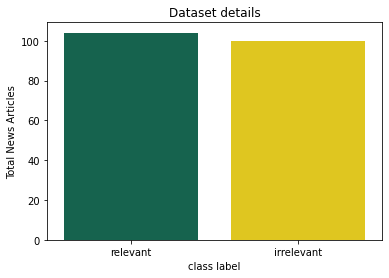

In [ ]:
sns.countplot(df_ai['class'],palette=['#097054',"#FFDE00"]).set_title('Dataset details') # Bar chart using seaborn chart to see the classes
plt.xlabel('class label') # Binary classes (event, irrelevant)
plt.ylabel('Total News Articles') # Total news for each class
plt.show()

<a name="wordcloud_full_text"></a>

**- WordCloud**: A word cloud is a collection words depicted in different sizes. The bigger and bolder the word appears, the more often it's mentioned within a given text and the more important it is. We generate a word cloud for each class to see its important words.

We see from both figures that the important words are "bird", "avian", "influenza", "animal", "flu" and "outbreak". All these terms are a clear indication of AI oubreaks. However, in the figure of the class "Irrelevant" we also observe some unrelated terms, such as "coranavirus", "market", "African", "pig", etc.

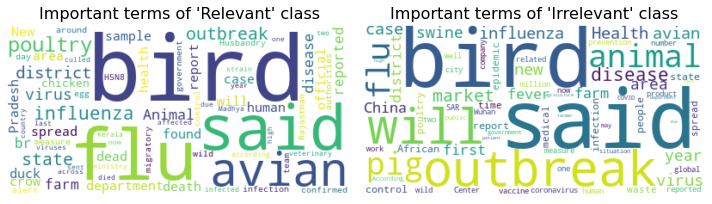

In [ ]:
def generate_wordcloud(text, title, ax):
  wordcloud = WordCloud(background_color='white', max_words=70, collocations=False).generate(text)
  ax.imshow(wordcloud, interpolation='bilinear')
  ax.axis("off")
  ax.set_title(title, fontdict = {'fontsize':16})

relevant_indexes = df_ai[df_ai['class'] == 'relevant'].index
relevant_articles = text_corpus.iloc[relevant_indexes]
relevant_text = " ".join(t for t in relevant_articles)

irrelevant_indexes = df_ai[df_ai['class'] == 'irrelevant'].index
irrelevant_articles = text_corpus.iloc[irrelevant_indexes]
irrelevant_text = " ".join(t for t in irrelevant_articles)

fig, axs = plt.subplots(1, 2, figsize=(10,7)) # width, height
generate_wordcloud(relevant_text, "Important terms of 'Relevant' class", axs[0])
generate_wordcloud(irrelevant_text, "Important terms of 'Irrelevant' class", axs[1])
fig.tight_layout()
fig.show()

<a name="preprocessor"></a>
#4. Preprocessor

As mentioned in the introduction, this step mainly consists in retrieving the content of news articles by removing irrelevant elements (pictures, ads, hyperlinks, etc.). This is what we do in the section [*Text Cleaning*](#preprocessor_textcleaning).

On top of that, we also add another processing step in the section [*Information Extraction*](#preprocessor_informationextraction). It consists in identifying and classifying *named entities* mentioned in unstructured text into pre-defined categories such as person names, organizations, locations, medical codes, time expressions, quantities, etc.

<a name="preprocessor_textcleaning"></a>
## Text Cleaning

**We perform the following tasks:**
* Removing accented chars
* Removing special characters
* Removing HTML tags
* Lemmatization
* Removing stopwords (from NLTK)
* Removing extra lines
* Lowercasing
* Removing extra newlines
* Removing special characters and\or digits    
* Inserting spaces between special characters to isolate them    
* Removing extra whitespace



In [ ]:
import spacy
nlp = spacy.load('en_core_web_md')

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text

def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

def remove_stopwords(text, is_lower_case=False):
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

# normalize each document in the corpus
def preprocess_text(doc):
    # strip HTML
    doc = strip_html_tags(doc)
    # remove accented characters
    doc = remove_accented_chars(doc)
    # lowercase the text
    doc = doc.lower()
    # remove extra newlines
    doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
    # lemmatize text
    doc = lemmatize_text(doc)
    # remove special characters and\or digits
    # insert spaces between special characters to isolate them
    special_char_pattern = re.compile(r'([{.(-)!}])')
    doc = special_char_pattern.sub(" \\1 ", doc)
    doc = remove_special_characters(doc, remove_digits=True)
    # remove extra whitespace
    doc = re.sub(' +', ' ', doc)
    # remove stopwords
    doc = remove_stopwords(doc, is_lower_case=True)
    return doc


In [ ]:
preprocessed_corpus = [preprocess_text(doc) for doc in text_corpus]
df_ai['preprocessed_text'] = preprocessed_corpus

**Bonus visualization: WordCloud with preprocessed texts**
Here we visually compare the important terms highlighted in WordCloud between unprocessed and processed texts. We observe that we could get rid of some unnecessary terms when applying the preprocessing step.



In [ ]:
relevant_indexes = df_ai[df_ai['class'] == 'relevant'].index
relevant_articles = df_ai.iloc[relevant_indexes]['preprocessed_text'].to_list()
relevant_preprocessed_text = " ".join(relevant_articles)

irrelevant_indexes = df_ai[df_ai['class'] == 'irrelevant'].index
irrelevant_articles = df_ai.iloc[irrelevant_indexes]['preprocessed_text'].to_list()
irrelevant_preprocessed_text = " ".join(irrelevant_articles)

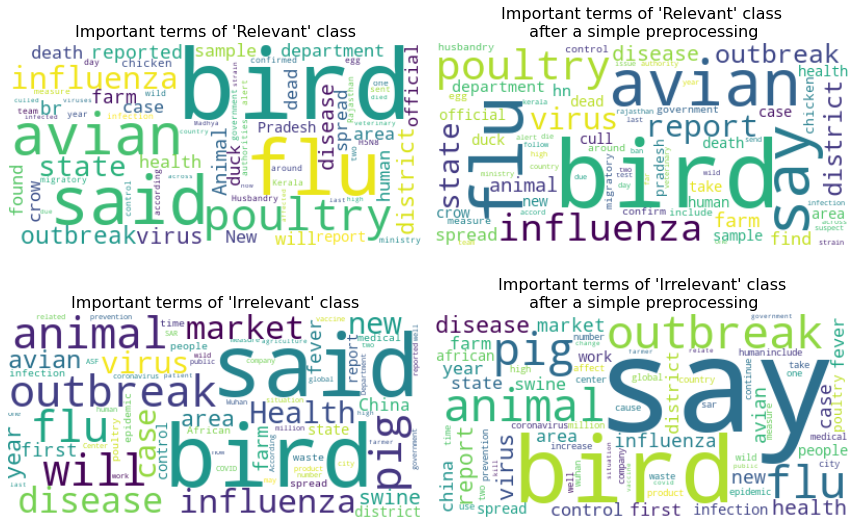

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12,8)) # width, height
generate_wordcloud(relevant_text, "Important terms of 'Relevant' class", axs[0,0])
generate_wordcloud(irrelevant_text, "Important terms of 'Irrelevant' class", axs[1,0])
generate_wordcloud(relevant_preprocessed_text, "Important terms of 'Relevant' class\n after a simple preprocessing", axs[0,1])
generate_wordcloud(irrelevant_preprocessed_text, "Important terms of 'Irrelevant' class\n after a simple preprocessing", axs[1,1])
fig.tight_layout()
fig.show()

<a name="preprocessor_informationextraction"></a>
## Information Extraction - Named Entity Recognition (optional)

In this step, we are interested in extracting two types of information: 1) spatial entities, also known as Geographical Political Entities, and 2) biomedical terms. We use the package '*spaCy*' for the former and '*scispaCy*' for the latter.

<a name="preprocessor_GPE"></a>
### Geographical Politcal Entity (GPE) extraction (optional)

We first extract GPEs from texts through the package '*spaCy*'. Namely, for each text of the article, we first identify named entities, then we keep only those corresponding to GPEs.

Note that this extraction is a statistical automatic process. Therefore, it is possible to encounter some irrelevant terms, e.g. "/>MANILA" in the 6th text (with index 19).

In [ ]:
nlp = spacy.load("en_core_web_md")

# init
gpe_dict = {}
counter = -1
for text in text_corpus.iloc:
    counter += 1
    gpe_dict[counter] = []

# retrieve all GPEs for each doc
counter = -1
for text in text_corpus.iloc: # for each text
    counter += 1
    doc = nlp(text) # the package "spaCy" detects named entities
    for ent in doc.ents: # iterate over the named entities of the text
        if ent.label_ == "GPE":
            gpe_dict[counter].append(ent.text)
            #print(ent.text, ent.start_char, ent.end_char, ent.label_)


gpe_count_list = []
gpe_str_list = []
for key, value in gpe_dict.items():
    gpe_count_list.append(len(np.unique(value)))
    gpe_str_list.append(";".join(value))

# create a data frame with 2 columns: "gpe" (all GPEs) and "count" (the number of distinct GPEs)
df_gpe = pd.DataFrame(zip(gpe_str_list, gpe_count_list), columns=["gpe", "count"])
print(df_gpe.iloc[14:20])

                                                  gpe  count
14  Delhi;New Delhi;Delhi;Delhi;Delhi;Jalandhar;De...     17
15  Delhi;Delhi;Rajasthan;Gujarat;Haryana;Himachal...     21
16  Guangxi;China;Kandiyohi County;Guangdong Provi...      4
17                         Paradip;Odisha;Paradip.<br      3
18                             Mkhwanasi;South Africa      2
19  />MANILA;Philippines;San Luis;Pampanga;Jaen;Sa...      8


Now, we extract the corresponding country information of the extracted GPEs. This task is known as "*geocoding*", since it consists in converting adresses (in our case, GPEs) into geographic information. For this purpose, we use the package "*pyphoton*".

 We first define a function, which performs this geocoding process from a text.

In [ ]:
from pyphoton import Photon
from pyphoton.errors import PhotonException
client_photon = Photon()

def get_country_of_gpe(gpe):
    try:
        location = client_photon.query(gpe, limit=1) # get the first result of the query
        if hasattr(location, "country"): # if the result has an attribute "country"
            return location.country
        else: # if not, the result was probably not a true GPE
            return ""
    except PhotonException as ex:
        print(ex)
    return ""

# print(get_country_of_gpe("berlin"))
# print(get_country_of_gpe("berlinrtzerz"))

Finally, we extract the country information from GPEs, and store these values in a data frame. Note that since we perform a geocoding query for each GPE, this takes approximately 3-4 mins.

In [ ]:
# initialize a dictionary, where the keys correspond to the indexes of the texts
# for each key, i.e. text, we will store the country information, i.e. a list of elements
country_dict = {k: [] for k in list(text_corpus.index)}

# initialize another dictionary as a lookup table in order to store the recent geocoding query results
# since each geocoding query takes a couple of seconds, this table will save us some time
lookup_dict = {}

for index, row in df_gpe.iterrows():
    gpe_list = row["gpe"].split(";")
    for gpe in gpe_list:
        country = ""
        if gpe in lookup_dict: # if we have already processed this gpe, then get the cache result
            country = lookup_dict[gpe]
        else: # if not, then use the "pyphoton" package for the geocoding process
            country = get_country_of_gpe(gpe)
            lookup_dict[gpe] = country
        if country != "": # if the result is not empty, i.e. a real GPE, add it into the list
            country_dict[index].append(country)

country_str_list = [";".join(vals) for vals in country_dict.values()]
df_country = pd.DataFrame(country_str_list, columns=["country"])
df_country["unique_country"] = df_country.apply(lambda row: ";".join(np.unique(row["country"].split(";"))), axis=1)
df_country["count"] = df_country.apply(lambda row: len(row["country"].split(";")), axis=1)
df_country["unique_count"] = df_country.apply(lambda row: len(np.unique(row["country"].split(";"))), axis=1)

print(df_country.head())


Missing search term 'q': /?q=berlin
Unknown query parameter ' madison'.  allowed parameters are: [q, location_bias_scale, debug, bbox, limit, osm_tag, lon, zoom, lang, lat]
                                             country        unique_country  \
0  India;India;United Kingdom;India;India;India;I...  India;United Kingdom   
1  India;India;India;India;India;India;India;Indi...                 India   
2  India;India;India;India;India;India;India;Indi...                 India   
3  India;India;India;India;India;India;India;Mala...        India;Malaysia   
4                                  India;India;India                 India   

   count  unique_count  
0     10             2  
1     11             1  
2     10             1  
3     30             2  
4      3             1  


**Bonus visualization: WordCloud from extracted countries**

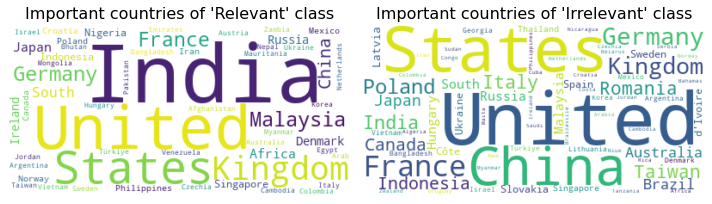

In [ ]:
relevant_indexes = df_ai[df_ai['class'] == 'relevant'].index
relevant_articles = df_country.iloc[relevant_indexes]["unique_country"]
relevant_text_country = " ".join(t for t in relevant_articles)

irrelevant_indexes = df_ai[df_ai['class'] == 'irrelevant'].index
irrelevant_articles = df_country.iloc[irrelevant_indexes]["unique_country"]
irrelevant_text_country = " ".join(t for t in irrelevant_articles)

fig, axs = plt.subplots(1, 2, figsize=(10,7)) # width, height
generate_wordcloud(relevant_text_country, "Important countries of 'Relevant' class", axs[0])
generate_wordcloud(irrelevant_text_country, "Important countries of 'Irrelevant' class", axs[1])
fig.tight_layout()
fig.show()

**Bonus visualization: Spatial distribution of Avian Influenza articles per class**

Complemantary to the previous WordCloud, we now visualize the spatial distributrion of news articles through a choropleth map with the package '*plotly*'. This package recognizes only alpha-3 codes of the countries. Therefore, we use the package '*pycountry*' to obtain them from country names.

In [ ]:
import pycountry # to  get the codes of countries, e.g. IND for India
from collections import Counter
import plotly.express as px # to visualize a choropleth map

def get_alpha3_code_country(country_list):
    result = [pycountry.countries.get(name=country).alpha_3 for country in country_list if pycountry.countries.get(name=country) is not None]
    return result

df_country["unique_alpha3"] = df_country.apply(lambda row: get_alpha3_code_country(row["unique_country"].split(";")), axis=1)
# print(df_country.head())

Finally, we plot a choropleth map for each class. The country colors in the map indicate the number of occurences of these countries in the corpus.

In [ ]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=['Spatial distribution of "Relevant" articles', 'Spatial distribution of "Irrelevant" articles'],
                    specs=[[{'type': 'choropleth'}, {'type': 'choropleth'}]])


for indx, class_name in enumerate(['relevant', 'irrelevant']):
    col_indx = indx+1
    class_indexes = df_ai[df_ai['class'] == class_name].index
    df_country_for_class = df_country.iloc[class_indexes]

    country_occs_iso = []
    for i in df_country_for_class["unique_alpha3"]:
        country_occs_iso.extend(i)

    df_map = pd.DataFrame.from_dict(Counter(country_occs_iso).items())
    df_map.columns = ["iso3", "count"]
    df_map["country"] = df_map.apply(lambda row: pycountry.countries.get(alpha_3=row["iso3"]).name, axis=1)

    fig_choropleth = px.choropleth(df_map, locations="iso3",
                        color="count", # lifeExp is a column of gapminder
                        hover_name="country", # column to add to hover information
                        color_continuous_scale=px.colors.sequential.Plasma)

    fig.add_trace(fig_choropleth['data'][0], row=1, col=col_indx)

fig.show()

<a name="preprocessor_Biomedical"></a>
### Biomedical Entity Extraction (optional)

In this part, we extract health related entities thanks to the package '*scispaCy*'. This package contains spaCy models for processing biomedical, scientific or clinical text.

This part of code takes a while (approximately 3-4 mins), because we have to download ~1GB of data and load a large JSON file (the knowledge base). Be patient! Thankfully it should be faster after the first time you use it, because the downloads are cached.

In [ ]:
import spacy
import scispacy

from scispacy.abbreviation import AbbreviationDetector
from scispacy.umls_linking import UmlsEntityLinker
nlp = spacy.load("en_core_sci_md")

# NOTE: The resolve_abbreviations parameter is optional, and requires that
# the AbbreviationDetector pipe has already been added to the pipeline. Adding
# the AbbreviationDetector pipe and setting resolve_abbreviations to True means
# that linking will only be performed on the long form of abbreviations.
nlp.add_pipe("scispacy_linker", config={"resolve_abbreviations": True, "linker_name": "umls"})

/usr/local/lib/python3.7/dist-packages/spacy/util.py:837: UserWarning:

[W095] Model 'en_core_sci_md' (0.5.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.3.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate



https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/data/linkers/2020-10-09/umls/tfidf_vectors_sparse.npz not found in cache, downloading to /tmp/tmpao_451qv
Finished download, copying /tmp/tmpao_451qv to cache at /root/.scispacy/datasets/e9f7327283e43f0482f7c0c71b71dec278a58ccb3ffdd03c2c2350159e7ef146.f2a350ad19015b2591545f7feeed6a6d6d2fffcd635d868a5d7fc0dfc3cadfd8.tfidf_vectors_sparse.npz
https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/data/linkers/2020-10-09/umls/nmslib_index.bin not found in cache, downloading to /tmp/tmp_4c8f5g5
Finished download, copying /tmp/tmp_4c8f5g5 to cache at /root/.scispacy/datasets/f48455d6c79262057cce66b4619123c2b558b21092d42fac97f47bb99a5b8f9f.dd70d3dffe7d90d7ac8914460e16a48375dab32485fb6313a34e6fbcaf53218b.nmslib_index.bin
https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/data/linkers/2020-10-09/umls/tfidf_vectorizer.joblib not found in cache, downloading to /tmp/tmpay_m6zxu
Finished download, copying /tmp/tmpay_m6zxu to cache at /root/.scispacy/da

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning:

Trying to unpickle estimator TfidfTransformer from version 0.20.3 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning:

Trying to unpickle estimator TfidfVectorizer from version 0.20.3 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations



https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/data/linkers/2020-10-09/umls/concept_aliases.json not found in cache, downloading to /tmp/tmpbz8inx3o
Finished download, copying /tmp/tmpbz8inx3o to cache at /root/.scispacy/datasets/1428ec15d3b1061731ea273c03699130b3d6b90948993e74bda66af605ff8e2a.aeb7a686c654df6bccb6c2c23d3eda3eb381daaefda4592b58158d0bee53b352.concept_aliases.json
https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/data/kbs/2020-10-09/umls_2020_aa_cat0129.jsonl not found in cache, downloading to /tmp/tmpdgl07lv1
Finished download, copying /tmp/tmpdgl07lv1 to cache at /root/.scispacy/datasets/4d7fb8fcae1035d1e0a47d9072b43d5a628057d35497fbfb2499b4b7b2dd4dd7.05ec7eef12f336d4666da85b7fa69b9401883a7dd4244473f7b88b413ccbba03.umls_2020_aa_cat0129.jsonl
https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/data/umls_semantic_type_tree.tsv not found in cache, downloading to /tmp/tmpk9g7gaqx
Finished download, copying /tmp/tmpk9g7gaqx to cache at /root/.scispacy/datasets/21a1012c53

Let us see an example of the extracted entities from a sample text. These entities are highlighted below. We see that it detects well the health-related and spatial entities.

In [ ]:
from spacy import displacy
displacy.render(next(nlp(df_ai.iloc[1]["title_text"]).sents), style='ent', jupyter=True)

/usr/local/lib/python3.7/dist-packages/scispacy/candidate_generation.py:284: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/usr/local/lib/python3.7/dist-packages/scispacy/candidate_generation.py:285: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



We extract the health-related entities for each article of the corpus.

In [ ]:
df_ai['scispaCy_entities'] = df_ai.apply(lambda row: ", ".join(map(str,list(nlp(row["title_text"]).ents))), axis=1)
# it outputs many deprecation warnings ...
print(df_ai.iloc[10:20]['scispaCy_entities'])

/usr/local/lib/python3.7/dist-packages/scispacy/candidate_generation.py:284: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/usr/local/lib/python3.7/dist-packages/scispacy/candidate_generation.py:285: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/usr/local/lib/python3.7/dist-packages/scispacy/candidate_generation.py:284: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=o

10    Himachal, Pradesh, CM, Thakur, Dharamsala, rev...
11    Avian Flu, Outbreak, India, Mass Poultry, Cull...
12    bird flu, Alappuzha, Kottayam districts, avian...
13    Bird flu, Zoological park, guard Hyderabad, ce...
14    Bird flu, Serious, threat, looms, Delhi, crows...
15    Bird, Confirmed, states, Delhi Uttarakhand, Ma...
16    Bird flu, Griffith researchers, virus, humans,...
17    Avian flu, Ban, poultry, sale, months, Paradip...
18    Bird, outbreak, KFC, Zinger Wing shortage, Sou...
19    Avian flu, poultry, ban partially lifted | Hea...
Name: scispaCy_entities, dtype: object


**Bonus visualization: WordCloud**

Recall that in section [Data classes Visualization](#wordcloud_full_text) we observed some useless words, e.g. "*said*", as important terms (particularly, in the plot of class "*Irrelevant*"). Hopefully, by using scyspaCy entities, we do not only eliminate these words, but we also keep only health related terms in our corpus.


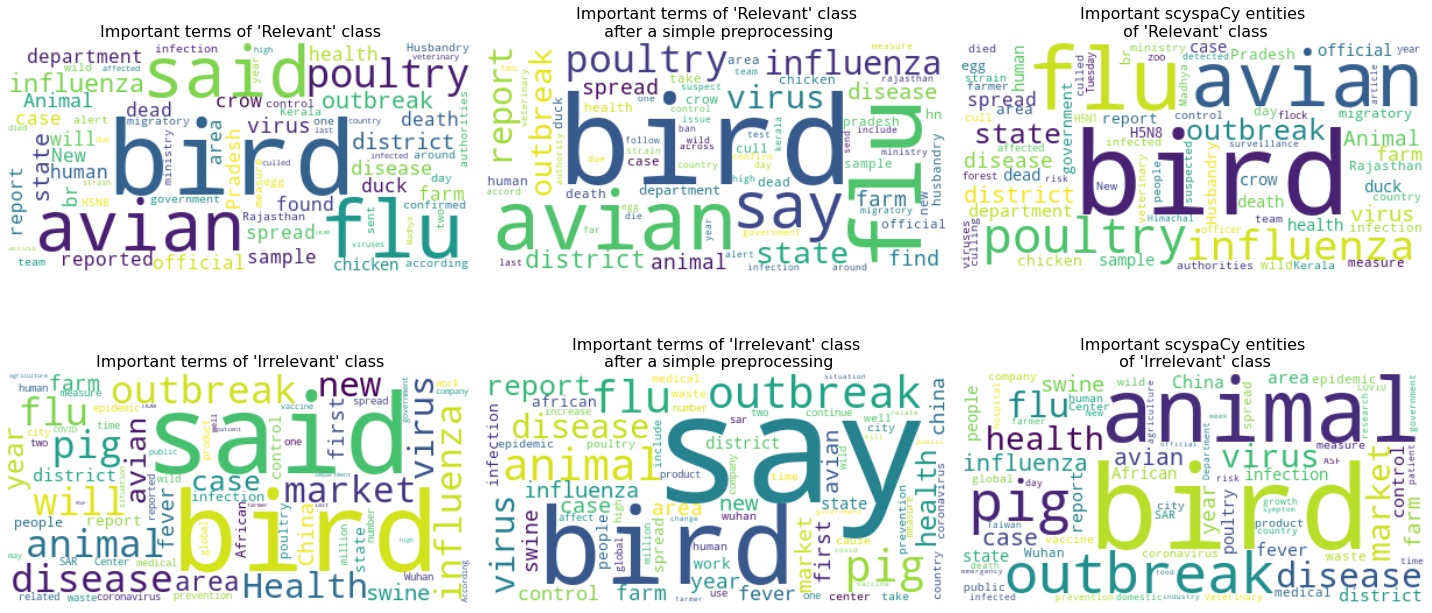

In [ ]:
relevant_indexes = df_ai[df_ai['class'] == 'relevant'].index
relevant_articles_with_scispaCy_entities = df_ai.iloc[relevant_indexes]['scispaCy_entities']
relevant_text_with_scispaCy_entities = " ".join(" ".join(t.split(", ")) for t in relevant_articles_with_scispaCy_entities)

irrelevant_indexes = df_ai[df_ai['class'] == 'irrelevant'].index
irrelevant_articles_with_scispaCy_entities = df_ai.iloc[irrelevant_indexes]['scispaCy_entities']
irrelevant_text_with_scispaCy_entities = " ".join(" ".join(t.split(", ")) for t in irrelevant_articles_with_scispaCy_entities)


fig, axs = plt.subplots(2, 3, figsize=(20,10)) # width, height
generate_wordcloud(relevant_text, "Important terms of 'Relevant' class", axs[0,0])
generate_wordcloud(irrelevant_text, "Important terms of 'Irrelevant' class", axs[1,0])
generate_wordcloud(relevant_preprocessed_text, "Important terms of 'Relevant' class\n after a simple preprocessing", axs[0,1])
generate_wordcloud(irrelevant_preprocessed_text, "Important terms of 'Irrelevant' class\n after a simple preprocessing", axs[1,1])
generate_wordcloud(relevant_text_with_scispaCy_entities, "Important scyspaCy entities\n of 'Relevant' class", axs[0,2])
generate_wordcloud(irrelevant_text_with_scispaCy_entities, "Important scyspaCy entities\n of 'Irrelevant' class", axs[1,2])
fig.tight_layout()
fig.show()

**If desired, we can use these scyspaCy entities as our text corpus.**

In [ ]:
text_corpus = df_ai['scispaCy_entities']

<a name="feature_extraction"></a>
#5. Feature Extraction

**We can extract features in many ways. In this notebook, we will explore six different methods.**

1. N-gram model
2. Tf-Idf model
3. Word2Vec model
4. Doc2Vec model
5. LDA: Topic model
6. User-defined features (e.g. based on named entities)


**We do not have to include all of them in the feature matrix for the training process. That is why we create a dictionary variable "*final_features_dict*" which collects the features of interest. If we want a feature model to be included, we can just add it into the dictionary. Finally, these features will be combined in the last section [*Combining all desired features*](#feature_extraction_final)**

In [ ]:
final_features_dict = {}

## N-gram model with N=1

**- Generate features from the text documents using *CountVectorizer*.**

In [ ]:
# vectorizer = CountVectorizer(preprocessor=preprocess_text) # default count vectorize
vectorizer = CountVectorizer()
vectorizer.fit(preprocessed_corpus) # Learn a vocabulary dictionary of all tokens

# Printing the first 10 features in the training dataset
print("Vocabulary: ", vectorizer.get_feature_names()[:10])

# Encode the Document
X_count = vectorizer.transform(preprocessed_corpus) # Transform documents to document-term matrix

# Summarizing the Encoded Texts
print("Document-Term Matrix:")
print(X_count.toarray())

Vocabulary:  ['aa', 'aabsa', 'aaima', 'aal', 'aanticipatea', 'aapmsa', 'aasan', 'aasfa', 'ab', 'abandon']
Document-Term Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
final_features_dict["1-gram"] = X_count

## Tf-Idf model

**- Generate features from the text documents using *TfidfVectorizer*.**

In [ ]:
# tfidf_vectorizer = TfidfVectorizer(preprocessor=preprocess_text) # default count vectorize
tfidf_vectorizer = TfidfVectorizer() # default count vectorize

# Encode the Document
X_tfidf = tfidf_vectorizer.fit_transform(preprocessed_corpus) # Transform documents to document-term matrix

# Printing the first 10 features in the training dataset
print("Vocabulary: ", tfidf_vectorizer.get_feature_names()[:10])

# Summarizing the Encoded Texts
print("Document-Term Matrix:")
print(X_tfidf.toarray())

Vocabulary:  ['aa', 'aabsa', 'aaima', 'aal', 'aanticipatea', 'aapmsa', 'aasan', 'aasfa', 'ab', 'abandon']
Document-Term Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
final_features_dict["Tf-idf"] = X_tfidf

## Word2Vec model (optional)

**- Generate features from the text documents using *Word2Vec* model.**

Note that for downloading the model the first time takes approximately 20 mins. Moreover, loading time for the model is approximately 2 mins.

In [ ]:
# #from gensim.models import KeyedVectors
# from gensim import models
# ##import wget
#
# #word2vec_path = 'https://drive.google.com/uc?export=download&id=1PX4NMRB03GC_oPniuu5OYFBJeWU__04M' # from my drive
# #wget.download(word2vec_path)
# #w2v_model = models.KeyedVectors.load_word2vec_format("word2vec-google-news-300.bin", binary=True)
#
# import gensim.downloader as api
# %time w2v_model = api.load('word2vec-google-news-300')


In [ ]:
# # https://colab.research.google.com/github/practical-nlp/practical-nlp/blob/master/Ch4/03_Word2Vec_Example.ipynb#scrollTo=m-WjFyC6b_IE
#
# DIMENSION = 300
#
# # Creating a feature vector by averaging all embeddings for all sentences
# def get_word2vec_embedding_features_one_doc(tokens, nb_dimension):
#     zero_vector = np.zeros(nb_dimension)
#     fvector = zero_vector
#     feat_for_this = np.zeros(nb_dimension)
#     count_for_this = 0 + 1e-5 # to avoid divide-by-zero
#     for token in tokens:
#         if token in w2v_model:
#             feat_for_this += w2v_model[token]
#             count_for_this +=1
#             fvector = feat_for_this/count_for_this
#     return fvector
#
#
# def get_word2vec_embedding_features_corpus(corpus):
#     feats = []
#     for tokens in corpus:
#         fvector = get_word2vec_embedding_features_one_doc(tokens, DIMENSION)
#         feats.append(fvector)
#     return feats
#
#
# word2vec = get_word2vec_embedding_features_corpus(preprocessed_corpus)
# X_word2vec = np.vstack(word2vec)
# # X_word2vec = csr_matrix(X_word2vec)
# print(X_word2vec.shape)

In [ ]:
# final_features_dict["word2vec"] = X_word2vec

## Doc2Vec model (optional)

**- Generate features from the text documents using *Word2Vec* model.**


In [ ]:
nb_docs = df_ai.shape[0]
nlp = spacy.load('en_core_web_md')
X_doc2vec = [nlp(str(text)).vector for text in preprocessed_corpus]
X_doc2vec = np.vstack(X_doc2vec)

In [ ]:
final_features_dict["doc2vec"] = X_doc2vec

## Topic modelling: LDA (optional)

**- Generate features from the text documents using *LDA* model.**

It is worth noting that the number of topics to be discovered is not known in advance. Ideally, we can estimate this number through several measures, but this is out of scope here. Therefore, we just stick to 5 topics for the sake of simplicty in this notebook.

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models

from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

preprocessed_corpus2 = [doc.split(" ") for doc in preprocessed_corpus]
dictionary = Dictionary(preprocessed_corpus2)
# I will filter out low-frequency and high-frequency tokens, also limit the vocabulary to a max of 1000 words:
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

corpus_topic = [dictionary.doc2bow(doc) for doc in preprocessed_corpus2]

lda_model = LdaMulticore(corpus=corpus_topic, id2word=dictionary, iterations=100, num_topics=5, workers = 8, passes=100)
# lda_model.print_topics(-1)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [ ]:
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus_topic, dictionary)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
#print(lda_model[corpus_topic][0])
#print(lda_model[corpus_topic][1])
#print(lda_model[corpus_topic][2])
# [(1, 0.25175694), (3, 0.7425621)]
# [(3, 0.8678217), (4, 0.12795173)]
# [(1, 0.16095419), (3, 0.8346758)]

nb_docs = df_ai.shape[0]
nb_topics = 5
X_lda_features = np.zeros((nb_docs, nb_topics))

for i in range(len(corpus_topic)):
    topics = lda_model[corpus_topic][i]
    topic_ids = [j[0] for j in topics]
    topic_vals = [j[1] for j in topics]
    X_lda_features[i,topic_ids] = topic_vals

X_lda_features = csr_matrix(X_lda_features)

In [ ]:
final_features_dict["LDA"] = X_lda_features

## User-defined features (optional)

For the sake of simplicity, we only consider two features:
Named Entity based features

1. **Spatial entities:** Number of distinct countries (based on the section [*GPE Extraction*](#preprocessor_GPE))
  *   **Hypothesis:** It is more likely that a news article mention only about a single country, when reporting a new outbreak information, e.g. see the first relevant article example in the section [*Inroduction*](#preprocessor_GPE)).


2. **Health-related entities:** Proportion of health-related entities (based on the section [*Biomedical Entity Extraction*](#preprocessor_Biomedical))
  *   **Hypothesis:**  It is more likely that a relevant news article contains many health-related terms.






In [ ]:
# print(preprocess_text(df_ai.iloc[0]["text"]))
entity_prop_list = df_ai.apply(lambda row: len(row["scispaCy_entities"].split(","))/len(row["preprocessed_text"].split(" ")), axis=1).to_list()

In [ ]:
X_user = np.column_stack([np.array(entity_prop_list), df_country["unique_count"].to_numpy()])
final_features_dict["User"] = X_user

<a name="feature_extraction_final"></a>
## Combining all desired features

**Determine the final features thanks to the dictionary variable '*final_features_dict*'**.

In [ ]:
X = scipy.sparse.hstack(list(final_features_dict.values()))
print(X.shape)

(204, 13969)


**Bonus: Visualization of the feature space for each feature extraction model**

0
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 204 samples in 0.001s...
[t-SNE] Computed neighbors for 204 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 204 / 204
[t-SNE] Mean sigma: 9.023424


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] KL divergence after 250 iterations with early exaggeration: 100.826607
[t-SNE] KL divergence after 1900 iterations: 0.966771
1
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 204 samples in 0.001s...
[t-SNE] Computed neighbors for 204 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 204 / 204
[t-SNE] Mean sigma: 0.284943


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.211044
[t-SNE] KL divergence after 1100 iterations: 0.620761
2
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 204 samples in 0.000s...
[t-SNE] Computed neighbors for 204 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 204 / 204
[t-SNE] Mean sigma: 0.400992


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.326981
[t-SNE] KL divergence after 1450 iterations: 0.640960
3
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 204 samples in 0.000s...
[t-SNE] Computed neighbors for 204 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 204 / 204
[t-SNE] Mean sigma: 0.272843


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.466591
[t-SNE] KL divergence after 1050 iterations: 0.197084


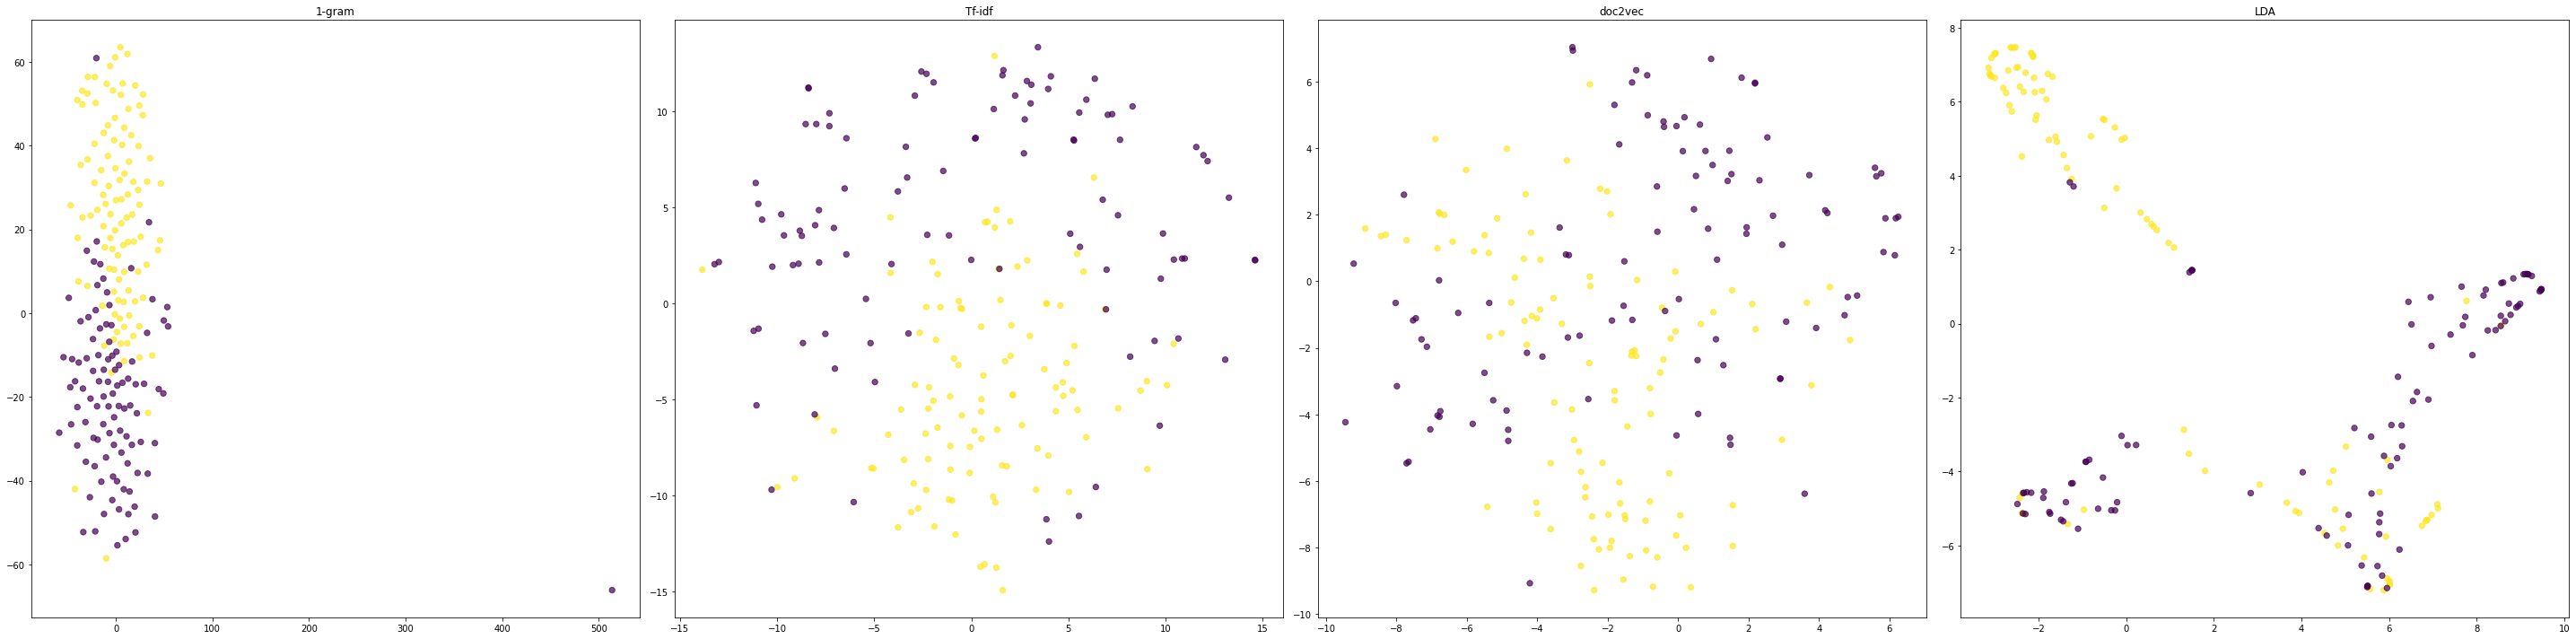

In [ ]:
from sklearn.manifold import TSNE

def plot_TSNE(X, title, ax):
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000,random_state = 17)
    df_tsne_scaled = tsne.fit_transform(X)
    ax.scatter(df_tsne_scaled[:, 0], df_tsne_scaled[:, 1], c=df_ai['class_int'], alpha=0.7, s=40)
    #ax.axis("off")
    ax.title.set_text(title)
    #ax.colorbar()

nb_feat_types = len(final_features_dict)
fig, axs = plt.subplots(1, nb_feat_types, figsize=(10*nb_feat_types,10)) # width, height
counter = 0
for feat_name in final_features_dict.keys():
    print(counter)
    plot_TSNE(final_features_dict[feat_name], feat_name, axs[counter])
    counter += 1

fig.tight_layout()
fig.show()

#6. Validation-Train-Test Split Scheme

**- Split the dataset into three sets: validation, train and test sets. There is no strict rule regarding split proportions, but the split with 20% - 20% - 60% is usually prefered in the litterature.**

In [ ]:
y = df_ai['class_int']
n = y.shape[0] # dataset size

indexes = np.arange(n)
train_test_indexes, val_indexes, y_train_test, y_val = train_test_split(indexes, y, test_size=0.2, random_state=12345, stratify=y)
X_train_test = X.toarray()[train_test_indexes,:]
X_val = X.toarray()[val_indexes,:]

y_val = y_val.to_numpy()
y_train_test = y_train_test.to_numpy()

df_train_test = df_ai.iloc[train_test_indexes]
print(X_val)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.21618268 0.        ]
 ...
 [0.         0.         0.         ... 0.72228748 0.13359483 0.07538272]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.32365981 0.         0.        ]]


**- Class distribution of training/test sets**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


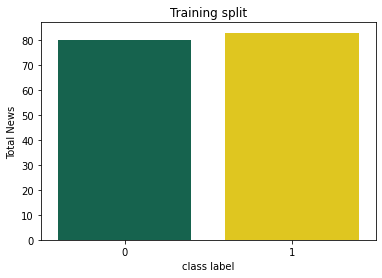

In [ ]:
sns.countplot(y_train_test,palette=['#097054',"#FFDE00"]).set_title('Training split') # Bar chart using seaborn chart to see the classes
plt.xlabel('class label') # Binary classes (event, irrelevant)
plt.ylabel('Total News') # Total news for each class
plt.show()

**- Class distribution of validation set**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


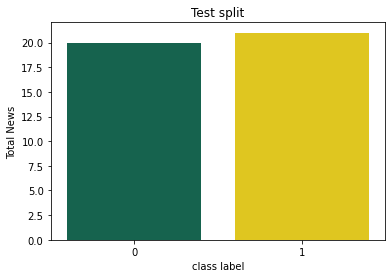

In [ ]:
sns.countplot(y_val,palette=['#097054',"#FFDE00"]).set_title('Test split') # Bar chart using seaborn chart to see the classes
plt.xlabel('class label') # Binary classes (event, irrelevant)
plt.ylabel('Total News') # Total news for each class
plt.show()

#7. Hyperparameter *tuning*

**- Select a classifier.**

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

classifier = SVC(probability=True)
param_grid = dict(kernel=['linear', 'poly', 'rbf', 'sigmoid'], C=[0.1, 1, 10, 25, 100], decision_function_shape=['ovo', 'ovr'])

# classifier = DecisionTreeClassifier(random_state=17)
# param_grid = {'max_depth': range(1,5), 'max_features': range(3,6), 'criterion': ['gini','entropy']}

# classifier = RandomForestClassifier(class_weight="balanced")
# param_grid = dict(n_estimators=[10, 50, 100], min_samples_split=[2,4,6,8], max_depth=[10,50,None], min_samples_leaf=[1,2,3])

**- Perform the hyperparameter tuning step**

In [ ]:
model_grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring="f1", cv=5, n_jobs = 4, error_score='raise')
model_grid_search.fit(X_val, y_val)

GridSearchCV(cv=5, error_score='raise', estimator=SVC(probability=True),
             n_jobs=4,
             param_grid={'C': [0.1, 1, 10, 25, 100],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1')

**- Evaluate all hyperparameters and select the best ones through the grid search mechanism.**

In [ ]:
best_parameters = model_grid_search.best_params_
print(best_parameters)
best_result = model_grid_search.best_score_
print(best_result)
#best_classifier = model_grid_search.best_estimator_
#print(best_classifier)

{'C': 25, 'decision_function_shape': 'ovo', 'kernel': 'rbf'}
0.9047619047619048


#8. Training & Testing

In [ ]:
# Fit model with the ebst hyperparameters
classifier.set_params(**best_parameters)
val_scores_svc = cross_val_score(classifier, X_train_test, y_train_test, cv=5, scoring='f1')
#print(val_scores_svc)
print(f"The mean F1 score using cross-validation is: "
      f"{np.mean(val_scores_svc):.3f} +/- {np.std(val_scores_svc):.3f}")

y_pred_svc = cross_val_predict(classifier, X_train_test, y_train_test, cv=5, method='predict')
#print(y_pred_svc)
y_pred_proba_svc = cross_val_predict(classifier, X_train_test, y_train_test, cv=5, method='predict_proba')
#print(y_pred_proba_svc)

y_pred_proba_svc_class_0 = y_pred_proba_svc[:,0]
y_pred_proba_svc_class_1 = y_pred_proba_svc[:,1]

The mean F1 score using cross-validation is: 0.905 +/- 0.034


#11. Visual Quantitative Evaluation

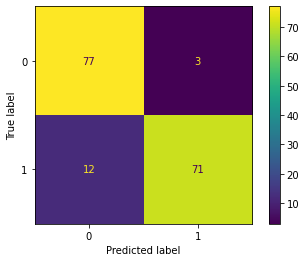

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_train_test, y_pred_svc)

cm_display = ConfusionMatrixDisplay(cm).plot()

SVC(C=25, decision_function_shape='ovo', probability=True)


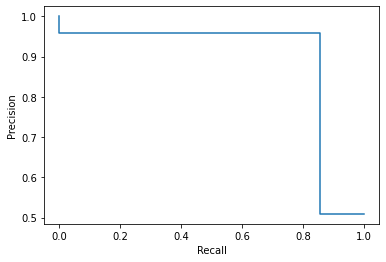

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

print(classifier)
prec, recall, _ = precision_recall_curve(y_train_test, y_pred_svc, pos_label=1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

In [ ]:
# before ROC curve display
# https://plotly.com/python/roc-and-pr-curves/
import plotly.express as px
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_train_test, y_pred_proba_svc_class_1)

# The histogram of scores compared to true labels
fig_hist = px.histogram(
    x=y_pred_proba_svc_class_1, color=y_train_test, nbins=50,
    labels=dict(color='True Labels', x='Score')
)

fig_hist.show()


# Evaluating model performance at various thresholds
df_rate = pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr
}, index=thresholds)
df_rate.index.name = "Thresholds"
df_rate.columns.name = "Rate"

fig_thresh = px.line(
    df_rate, title='TPR and FPR at every threshold',
    width=700, height=500
)

fig_thresh.update_yaxes(scaleanchor="x", scaleratio=1)
fig_thresh.update_xaxes(range=[0, 1], constrain='domain')
fig_thresh.show()

/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(key, collections.Hashable):
/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.divide(0.4, 1, casting="unsafe", dtype=np.float),


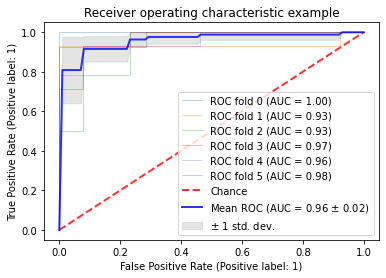

In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)


fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X_train_test, y_train_test)):
    # print(train)
    classifier.fit(X_train_test[train], y_train_test[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X_train_test[test],
        y_train_test[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

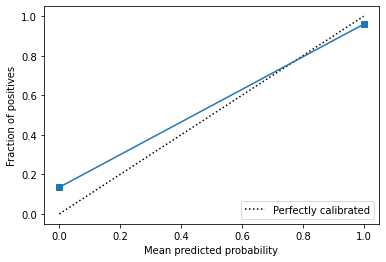

In [ ]:
# https://scikit-learn.org/stable/modules/calibration.html#calibration
from sklearn.calibration import calibration_curve, CalibrationDisplay

prob_true, prob_pred = calibration_curve(y_train_test, y_pred_svc, n_bins=10)
disp = CalibrationDisplay(prob_true, prob_pred, y_pred_proba_svc_class_1)
disp.plot()

**- Investigation on falsely predicted texts**

In [ ]:
diff_index = [i for i in range(len(y_pred_svc)) if y_pred_svc[i] != y_train_test[i]]
print(diff_index)
df_copy = df_train_test.copy()
df_copy["y_test"] = y_train_test
df_copy["y_pred"] = y_pred_svc
df_diff = df_train_test.iloc[diff_index]
print(df_diff)

[9, 11, 13, 37, 50, 52, 57, 68, 74, 83, 98, 102, 111, 128, 160]
             id                                              title  \
101  03ac24d509  Suspected Avian Flu Outbreak in Norwegian Turk...   
45   TG8FC4NM6W  Avian flu: Centre issues guidelines, states to...   
21   26bbcf8bc9  Bird flu scare: Mizoram districts ban import o...   
37   1WW99H324R                                   Unusual egg glut   
36   QCYM7G6MZ0  The trade war is making U.S. pork producers sq...   
131  6NTO8MKMXE  Latvian government approves amendments to impr...   
38   R3FORMUQ10  Shadegan wetland monitored for highly pathogen...   
132  TTBDN39S4N  Sen. Warner urges the president to get China's...   
19   627d34ab98  Avian flu poultry ban partially lifted | Headl...   
16   f27dad9625  Bird flu: Griffith researchers closer to under...   
92   MRPDKDSFDX  Amid avian flu scare, heaps of dead hen dumped...   
102  c73aecc6fa  Thousands of Quails Died from Avian Influenza ...   
135  IJDDUR7OWY  Fred Hutc

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px
# source: https://plotly.com/python/knn-classification/

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000,random_state = 17)
df_tsne_scaled = tsne.fit_transform(X_train_test)
fig = px.scatter(
    df_tsne_scaled, x=0, y=1,
    color=y_pred_proba_svc_class_1, color_continuous_scale='RdBu',
    symbol=y_train_test, symbol_map={0: 'square-dot', 1: 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>first class'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 163 samples in 0.004s...
[t-SNE] Computed neighbors for 163 samples in 0.039s...
[t-SNE] Computed conditional probabilities for sample 163 / 163
[t-SNE] Mean sigma: 9.940310
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.215729
[t-SNE] KL divergence after 2000 iterations: 0.795886


In [ ]:
# source: https://plotly.com/python/horizontal-bar-charts/
# viz prediction probabilities
import plotly.graph_objects as go

#print(train_test_indexes)
#print(df_ai.shape)
ids = df_ai.iloc[train_test_indexes]["id"]
n_classes = y_pred_proba_svc.shape[1]

styles = ['rgba(246, 78, 139, 0.6)', 'rgba(58, 71, 80, 0.6)', 'rgba(46, 78, 139, 0.6)']

fig = go.Figure()
for i in range(n_classes):
    y_prob = y_pred_proba_svc[:,i]
    fig.add_trace(go.Bar(
        y=ids,
        x=y_prob,
        name=i,
        orientation='h',
        marker=dict(
        color=styles[i]
        )
    ))

fig.update_layout(barmode='stack')
fig.show()

# TODO: why some bars exceed the score of 1 ??

**sankey diagram**: compare test labels and the predicted labels from 2 classifiers.

*   On the left: the SVC classifier predictions.
*   In the middle: true labels.
*   On the right: Random Forest classifier predictions.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(class_weight="balanced")
param_grid = dict(n_estimators=[10, 50, 100], min_samples_split=[2,4,6,8], max_depth=[10,50,None], min_samples_leaf=[1,2,3])
model_grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring="f1", cv=5, n_jobs = 4, error_score='raise')
model_grid_search.fit(X_val, y_val)

best_parameters = model_grid_search.best_params_
# best_result = model_grid_search.best_score_
classifier.set_params(**best_parameters)
val_scores_rf = cross_val_score(classifier, X_train_test, y_train_test, cv=5, scoring='f1')
print(f"The mean F1 score using cross-validation is: "
      f"{np.mean(val_scores_rf):.3f} +/- {np.std(val_scores_rf):.3f}")

y_pred_rf = cross_val_predict(classifier, X_train_test, y_train_test, cv=5, method='predict')
#print(y_pred)
y_pred_proba_rf = cross_val_predict(classifier, X_train_test, y_train_test, cv=5, method='predict_proba')
#print(y_pred_proba)

The mean F1 score using cross-validation is: 0.907 +/- 0.034


In [ ]:
# https://plotly.com/python/sankey-diagram/
# https://plotly.github.io/plotly.py-docs/generated/plotly.graph_objects.Sankey.html

import plotly.graph_objects as go

svc_labels = ["svc"+str(l) for l in y_pred_svc]
rf_labels = ["rf"+str(l) for l in y_pred_rf]
true_labels = ["true"+str(l) for l in y_train_test]

labels = list(set(rf_labels + svc_labels + true_labels))
label_indxs = list(range(len(labels)))
label_dict = dict(zip(labels,label_indxs))

new_true_labels = [label_dict[l] for l in true_labels]
new_svc_labels = [label_dict[l] for l in svc_labels]
new_rf_labels = [label_dict[l] for l in rf_labels]
#print(new_true_labels)
#print(new_svc_labels)
#print(new_rf_labels)
# --------------------------------------------------------

df1 = pd.DataFrame(list(zip(new_svc_labels, new_true_labels)), columns=['svc','true'])
df1_grouped = df1.groupby(['svc','true'])['svc'].size().reset_index(name='counts')
#   true  svc  counts
#0     3    0      27
#1     3    2      18
#2     5    0       6
#3     5    2      28

df2 = pd.DataFrame(list(zip(new_true_labels, new_rf_labels)), columns=['true','rf'])
df2_grouped = df2.groupby(['true','rf'])['true'].size().reset_index(name='counts')
#   svc  rf  counts
#0    0   1      25
#1    0   4       8
#2    2   1      10
#3    2   4      36

df1_grouped.rename(columns={'true':'target','svc':'source',},inplace=True)
df2_grouped.rename(columns={'true':'source','rf':'target'},inplace=True)
df_all = pd.concat([df1_grouped,df2_grouped],ignore_index=True)


fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels,
      color = "blue",
    ),
    link = dict(
      source = df_all["source"].to_list(), # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = df_all["target"].to_list(),
      value = df_all["counts"].to_list()
      ),
      textfont=dict(color="blue", size=40)
    )])

for x_coordinate, column_name in enumerate(["SVC","Truth","Random Forest"]):
  fig.add_annotation(
          x=x_coordinate,
          y=1.15,
          xref="x",
          yref="paper",
          text=column_name,
          showarrow=False,
          font=dict(
              family="Courier New, monospace",
              size=40,
              color="tomato"
              ),
          align="center",
          )

# fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

#12. Visual Qualitative Evaluation

The final visualization tool is '*Circos*', and we use it through the package '*pycircos*'. We visualize the news articles in the train-test set, accompanied with prediction-related information, in a circular layout. In the following, we describe the figure from the periphery to the center.

The outer ring shows the true class labels of these articles. The next ring represents the predicted labels of these articles for a given classifier. In case of a perfect prediction, these two outer rings are in the same color. Otherwise, we observe some color inconsistencies, corresponding to false positive and false negative samples. In the middle ring, the article ids are shown. The next ring contains of bar plots, which represent the prediction probabilities of a given classifier for the 'Relevant' class. Finally, the links between articles are drawn at the center, and indicate the pairs of highly-contextually similar articles of the same class, which are classified differently.


**Remarks:** 1) Note that the link weights are not useless in this context. 2) This tool is avaiable only for binary classification results for now.

In [ ]:
import pandas as pd
import numpy as np
import pycircos
import matplotlib.pyplot as plt
from collections import Counter
import collections


# y_test
# y_pred
# y_prob_class1
def plot_circos(df_nodes, df_links):

    Garc    = pycircos.Garc
    Gcircle = pycircos.Gcircle

    color_dict   = {"0":"#00C6C7", "1":"#777777"}

    true_class_labels = df_nodes["y_test"].to_list()
    true_classes = np.unique(true_class_labels)
    true_classes_counts = Counter(true_class_labels)
    df_nodes["test_start"] = 0

    for label in true_classes:
        indxs = df_nodes[df_nodes["y_test"] == label].index
        count = -1
        for i in indxs:
            count = count + 2
            df_nodes.iloc[i, df_nodes.columns.get_loc("test_start")] = count

    #Set chromosomes
    circle = Gcircle()
    for label in true_classes:
        name   = str(label)
        length = true_classes_counts[label]*2
        arc    = Garc(arc_id=name, size=length, interspace=3, raxis_range=(950,1000), labelposition=60, label_visible=True, facecolor=color_dict[name])
        circle.add_garc(arc)

    circle.set_garcs(0,360)


    # ====================================================================


    arcdata_dict = collections.defaultdict(dict)
    df_nodes.sort_values(['y_test','test_start'],inplace=True)
    for index, row in df_nodes.iterrows():
        id = str(row["id"])
        name  = str(row["y_test"])
        color  = str(row["y_pred"])
        start = int(row["test_start"])-1
        width = 2
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["widths"]    = []
            arcdata_dict[name]["colors"]    = []
        arcdata_dict[name]["positions"].append(start)
        arcdata_dict[name]["widths"].append(width)
        arcdata_dict[name]["colors"].append(color_dict[color])

    for key in arcdata_dict:
        circle.barplot(key, data=[1]*len(arcdata_dict[key]["positions"]), positions=arcdata_dict[key]["positions"],
                      width=arcdata_dict[key]["widths"], raxis_range=[900,950], facecolor=arcdata_dict[key]["colors"])





    #     def tickplot(self, garc_id, raxis_range=None, tickinterval=1000, tickpositions=None, ticklabels=None, tickwidth=1, tickcolor="#303030", ticklabelsize=10, ticklabelcolor="#303030", ticklabelmargin=10, tickdirection="outer", ticklabelorientation="vertical"):
    for arc_id in circle.garc_dict:
        ids = df_nodes[df_nodes["y_test"] == int(arc_id)]["id"].to_list()
        pos = df_nodes[df_nodes["y_test"] == int(arc_id)]["test_start"].to_list()
        pos_adj = np.array([int(x) for x in pos])
        #circle.tickplot(arc_id, raxis_range=(700,900), tickinterval=1, ticklabels=ids, tickdirection='outer', tickcolor='white', tickwidth=0.5, ticklabelsize=5, ticklabelorientation="vertical", ticklabelmargin=-150)
        circle.tickplot(arc_id, raxis_range=(700,900), tickpositions=pos_adj, ticklabels=ids, tickdirection='outer', tickcolor='white', tickwidth=0.5, ticklabelsize=5, ticklabelorientation="vertical", ticklabelmargin=-150)



    # ====================================================================


    #bar plot
    values_all   = []
    arcdata_dict = collections.defaultdict(dict)
    for index, row in df_nodes.iterrows():
        id = str(row["id"])
        name  = str(row["y_test"])
        color  = str(row["y_pred"])
        value = str(row["y_prob_class1"])
        start = int(row["test_start"])-1
        end   = start+2
        width = end-start
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["widths"]    = []
            arcdata_dict[name]["values"]    = []
        arcdata_dict[name]["positions"].append(start)
        arcdata_dict[name]["widths"].append(width)
        arcdata_dict[name]["values"].append(float(value))

    vmin, vmax = 0, 1
    for key in arcdata_dict:
        circle.barplot(key, data=arcdata_dict[key]["values"], positions=arcdata_dict[key]["positions"],
                      width=arcdata_dict[key]["widths"], base_value=0.0, rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)],
                      raxis_range=[600,700], facecolor="y", spine=True)



    # ===========================================================

    def calculate_start_stop(df_nodes, df_links):
        df_copy = df_links.copy()
        final = pd.DataFrame()
        unique_nodes = set(df_copy["source"].to_list()+df_copy["target"].to_list())
        for node in unique_nodes:
            # print("node", node)
            # get its position
            pos = df_nodes.iloc[node,df_nodes.columns.get_loc("test_start")]
            # print(pos)
            #calculate for each gene separately
            df1 = df_copy[df_copy["source"] == node]
            df2 = df_copy[df_copy["target"] == node]
            df2_temp = df2.rename(columns={'source':'temp','target':'source'},inplace=False)
            df2 = df2_temp.rename(columns={'temp':'target'},inplace=False)
            df3 = pd.concat([df1,df2], ignore_index=True)
            df3.sort_values(["source", "target"],inplace=True)
            #add the columns together
            cumsum_vals_end = df3["value"].cumsum()
            max_v = max(cumsum_vals_end)
            cumsum_vals_start = cumsum_vals_end - 1
            # cumsum_vals = cumsum_vals + 1
            cumsum_props_end = (cumsum_vals_end)/max_v
            cumsum_props_start = (cumsum_vals_start)/max_v
            #df3['end'] = pos+cumsum_props_end*2 - 1
            #df3['start'] = pos+cumsum_props_start*2 - 1
            df3['end'] = pos+cumsum_props_end*1 - 1
            df3['start'] = pos+cumsum_props_start*1 - 1
            final = pd.concat([final,df3],ignore_index=True)
        return(final)


    def calculate_start_stop_pair(df_links, df_start_stop):
        df_final = df_links.copy()
        start_dict = dict(zip(df_start_stop["source"].astype(str)+"_"+df_start_stop["target"].astype(str),df_start_stop["start"]))
        end_dict = dict(zip(df_start_stop["source"].astype(str)+"_"+df_start_stop["target"].astype(str),df_start_stop["end"]))
        start1_list = []
        end1_list = []
        start2_list = []
        end2_list = []
        #print(start_dict)
        #print(end_dict)
        for index, row in df_links.iterrows():
            source = str(row["source"])
            target = str(row["target"])
            start1_list.append(start_dict[source+"_"+target])
            end1_list.append(end_dict[source+"_"+target])
            start2_list.append(start_dict[target+"_"+source])
            end2_list.append(end_dict[target+"_"+source])
        df_final["start1"] = start1_list
        df_final["end1"] = end1_list
        df_final["start2"] = start2_list
        df_final["end2"] = end2_list
        # since the links do not cover the whole node width, we put the links in the middle of the node width
        df_final.iloc[:,df_final.columns.get_loc("start1")] += 0.25
        df_final.iloc[:,df_final.columns.get_loc("end1")] += 0.25
        df_final.iloc[:,df_final.columns.get_loc("start2")] += 0.25
        df_final.iloc[:,df_final.columns.get_loc("end2")] += 0.25
        return(df_final)

    df_start_stop = calculate_start_stop(df_nodes, df_links)
    df_links_with_start_stop = calculate_start_stop_pair(df_links, df_start_stop)

    #draw edges
    values_all   = []
    arcdata_dict = collections.defaultdict(dict)
    for index, row in df_links_with_start_stop.iterrows():
        pos1 = int(row["source"])
        name1  = str(df_nodes.iloc[pos1, df_nodes.columns.get_loc("y_test")])
        start1 = row["start1"]
        end1   = row["end1"]
        pos2  = int(row["target"])
        name2  = str(df_nodes.iloc[pos2, df_nodes.columns.get_loc("y_test")])
        start2 = row["start2"]
        end2   = row["end2"]
        source = (name1, start1, end1, 600)
        destination = (name2, start2, end2, 600)
        circle.chord_plot(source, destination, facecolor="#ff4081") # circle.garc_dict[name1].facecolor


    circle.figure.show()


We need to define 2 variables before calling the function '*plot_circos*': 1) nodes information wit attributes and 2) edges information

In [ ]:
df_nodes = df_train_test.copy().reset_index(drop=True)
df_nodes["y_test"] = y_train_test
df_nodes["y_pred"] = y_pred_svc
df_nodes["y_prob_class1"] = y_pred_proba_svc_class_1
df_nodes = df_nodes.sort_values(by=['y_test'], ascending=True).reset_index(drop=True)

Starting from here, we start to create links. Recall that the links between articles are drawn indicate the pairs of highly-contextually similar articles of the same class, which are classified differently. To do so, we first obtain a vector represention of each article text through the Doc2Vec model. Then, we compute the cosine similarity between each pair of vectors and obtain a similarity matrix. We apply a thresold approach to determine highly-contextually similar articles. Finally, we keep those scores between the articles of the same class, classified differently. Note that in this example, we set the threshold to *0.97* to obtain few link relations.

In [ ]:
# A sample data frame for links
#sources = [0, 2, 8]
#targets = [3, 6, 19]
#values = [1, 1, 1]
#df_links = pd.DataFrame(list(zip(sources, targets, values)), columns= ["source","target","value"])
#print(df_links)

In [ ]:
nb_docs = df_train_test.shape[0]
nlp = spacy.load('en_core_web_md')
doc2vec_dict = {i: nlp(str(df_nodes.iloc[i]["preprocessed_text"])).vector for i in range(nb_docs)}

In [ ]:
# https://newscatcherapi.com/blog/ultimate-guide-to-text-similarity-with-python
from numpy.linalg import norm

threshold = 0.97

sim_mat = np.zeros((nb_docs, nb_docs))
for i in range(nb_docs):
    sim_mat[i,i] = 1.0
    for j in range(nb_docs):
        if i<j:
            vec1 = doc2vec_dict[i]
            vec2 = doc2vec_dict[j]
            cosine = np.dot(vec1,vec2)/(norm(vec1)*norm(vec2)) # compute cosine similarity
            sim_mat[i,j] = cosine
            sim_mat[j,i] = cosine

sim_mat[sim_mat >= threshold] = 1
sim_mat[sim_mat < threshold] = 0

In [ ]:
coprediction_mat = np.zeros((nb_docs, nb_docs))
for i in range(nb_docs):
    coprediction_mat[i,i] = 0
    for j in range(nb_docs):
        if i<j:
            if df_nodes.iloc[i]["y_test"] == df_nodes.iloc[j]["y_test"] and df_nodes.iloc[i]["y_pred"] != df_nodes.iloc[j]["y_pred"]:
                coprediction_mat[i,j] = 1
                coprediction_mat[j,i] = 1
            else:
                coprediction_mat[i,j] = 0
                coprediction_mat[j,i] = 0

# element-wise multiplication: in the result, we are interested only in the cases, where the score equals 1.
result = np.multiply(sim_mat, coprediction_mat)

sources = []
targets = []
values = [] # this variable is useless in our context
for i in range(nb_docs):
    for j in range(nb_docs):
        if i<j:
            if result[i,j] == 1:
                 sources.append(i)
                 targets.append(j)
                 values.append(1)

df_links = pd.DataFrame(list(zip(sources, targets, values)), columns= ["source","target","value"])
print(df_links)

    source  target  value
0       81     127      1
1       83     127      1
2       84     127      1
3       94     127      1
4       98     109      1
5       99     127      1
6      100     109      1
7      100     127      1
8      106     149      1
9      109     118      1
10     109     130      1
11     109     137      1
12     109     156      1
13     113     127      1
14     115     127      1
15     118     127      1
16     119     154      1
17     121     127      1
18     124     127      1
19     127     130      1
20     127     137      1
21     127     143      1
22     127     145      1
23     127     150      1
24     127     156      1
25     127     157      1
26     131     154      1
27     142     154      1
28     144     154      1
29     154     161      1


Finally, we plot the circular plot.

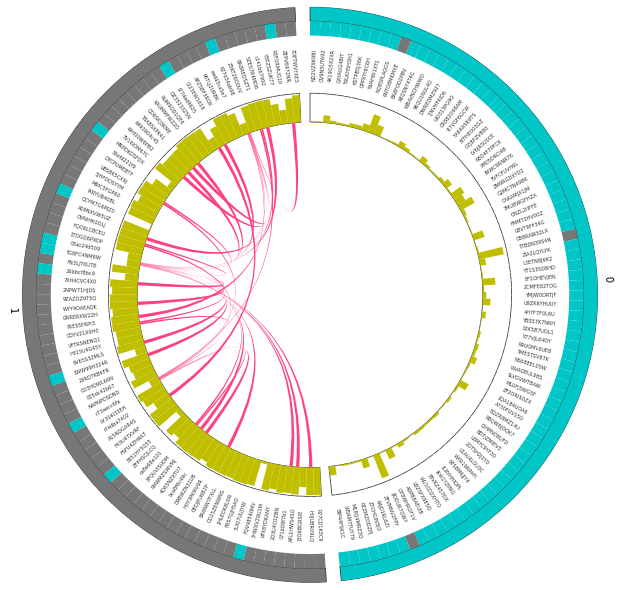

In [ ]:
plot_circos(df_nodes, df_links)